# AR모형

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   # for heatmap
import scipy.stats


In [12]:
df = pd.read_csv('stock.csv')
df.index = pd.to_datetime(df['날짜'])
df = df.drop('날짜', axis=1)

In [6]:
df.head()

,hive,sm,yg,JYP,kospi200
날짜,,,,,
2022-01-20 09:01:00,278000,"66,300",46950,43900,377.94
2022-01-20 09:02:00,277000,"66,500",47050,44100,377.66
2022-01-20 09:03:00,277000,"66,600",47150,44050,377.59
2022-01-20 09:04:00,277000,"66,800",47250,44100,377.06
2022-01-20 09:05:00,279000,"66,900",47450,44350,377.32


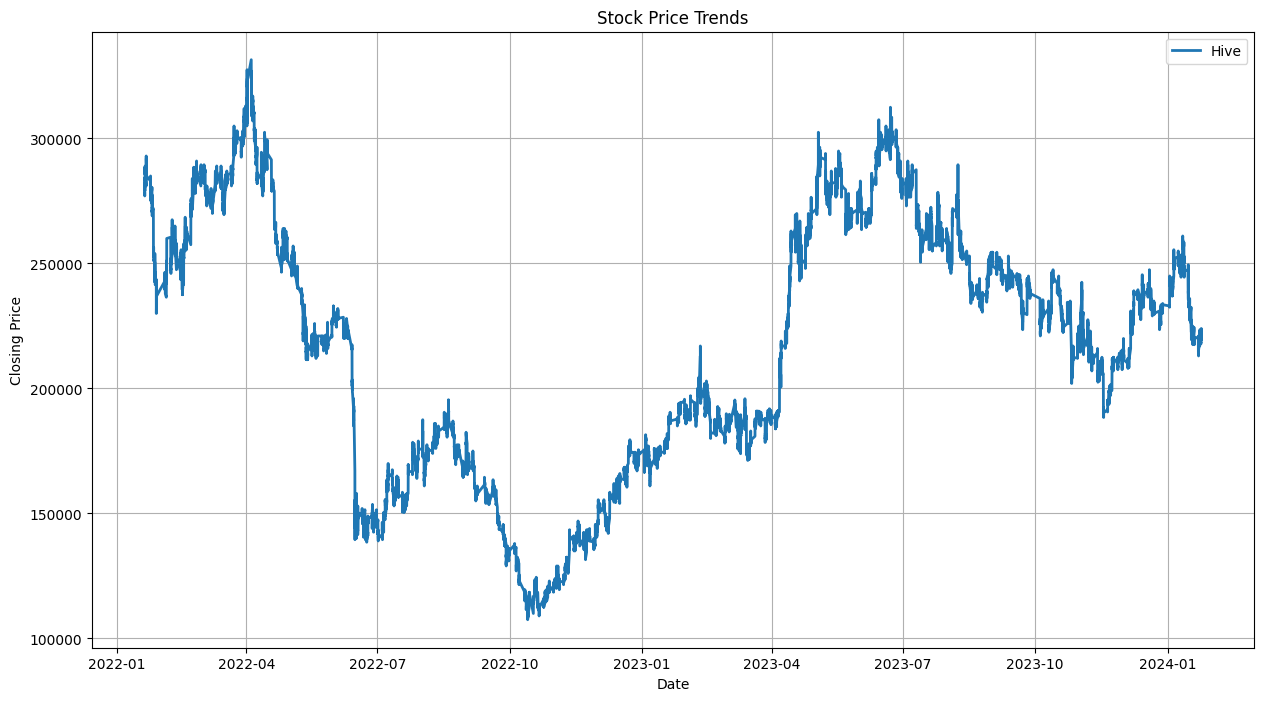

In [15]:
plt.figure(figsize=(15, 8))

# Plotting each series
plt.plot(df['hive'], label='Hive', lw=2)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Trends')
plt.legend()
plt.grid(True)

plt.show()

In [16]:
size = int(len(df) * 0.8)
size

150622

In [17]:
df_train = df.iloc[:size]              
df_test = df.iloc[size:]    # 20% test data

In [26]:
# AR model
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2  
## AR(1)


In [27]:
## AR(1)
hive = pd.DataFrame(df['hive'])
hive

,hive
날짜,
2022-01-20 09:01:00,278000
2022-01-20 09:02:00,277000
2022-01-20 09:03:00,277000
2022-01-20 09:04:00,277000
2022-01-20 09:05:00,279000
...,...
2024-01-24 15:17:00,221000
2024-01-24 15:18:00,221500
2024-01-24 15:19:00,221500


In [30]:
from statsmodels.tsa.arima.model import ARIMA

model_ar_1 = ARIMA(hive, order=(1, 0, 0))
result_ar_1 = model_ar_1.fit()
result_ar_1.summary()

c:\python\envs\moon\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python\envs\moon\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python\envs\moon\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   hive   No. Observations:               188278
Model:                 ARIMA(1, 0, 0)   Log Likelihood            -1424440.721
Date:                Wed, 21 Feb 2024   AIC                        2848887.441
Time:                        17:03:27   BIC                        2848917.878
Sample:                             0   HQIC                       2848896.423
                             - 188278                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.155e+05      0.061   3.54e+06      0.000    2.16e+05    2.16e+05
ar.L1          1.0000   2.05e-05   4.87e+04      0.000       1.000       1.000
sigma2      2.182e+05    104.741   2083.559      0.000    2.18e+05    2.18e+05
===================================================================================
Ljung-Box (L1) (Q):                8200.96   Jarque-Bera (JB):          63998455.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -1.21
Prob(H) (two-sided):                  0.86   Kurtosis:                        93.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.2e+19. Standard errors may be unstable.
"""

In [ ]:
## 이동평균 모형 



In [1]:
# chapter 10 일변량 시계열 예측
import statsmodels
statsmodels.__version__

'0.14.1'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from statsmodels.tsa.api import (kpss, adfuller, 
                                 seasonal_decompose, STL)
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
import statsmodels as sm


In [3]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
#plt.rcParams['figure.dpi'] = 100          ## use 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=14)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

In [15]:
stock = pd.read_csv("stock.csv", 
                   index_col='날짜',
                   parse_dates=True,
                   skipfooter=1)

milk = pd.read_csv("연습용.csv",
                   encoding= 'cp949',
                   index_col='시점',
                   parse_dates=True)

C:\Users\문지환\AppData\Local\Temp\ipykernel_19048\2193609299.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  stock = pd.read_csv("stock.csv",
C:\Users\문지환\AppData\Local\Temp\ipykernel_19048\2193609299.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  milk = pd.read_csv("연습용.csv",


In [16]:
stock

,hive,sm,yg,JYP,kospi200
날짜,,,,,
2022-01-20 09:01:00,278000,"66,300",46950,43900,377.94
2022-01-20 09:02:00,277000,"66,500",47050,44100,377.66
2022-01-20 09:03:00,277000,"66,600",47150,44050,377.59
2022-01-20 09:04:00,277000,"66,800",47250,44100,377.06
2022-01-20 09:05:00,279000,"66,900",47450,44350,377.32
...,...,...,...,...,...
2024-01-24 15:16:00,221000,"82,600",45100,84200,332.97
2024-01-24 15:17:00,221000,"82,300",45200,84200,332.81
2024-01-24 15:18:00,221500,"82,400",45250,84100,332.84


In [17]:
milk

,실업률 (%),시장금리,소비자물가지수
시점,,,
2002-01-01,4.1,4.79,66.308
2002-02-01,4.1,4.54,66.624
2002-03-01,3.8,4.64,67.003
2002-04-01,3.4,4.79,67.382
2002-05-01,3.1,4.81,67.634
...,...,...,...
2023-09-01,2.3,3.76,112.830
2023-01-01,2.1,3.82,113.260
2023-11-01,2.3,3.83,112.670


In [18]:
stock.shape

(188277, 5)

In [14]:
milk.shape

(265, 3)

<Axes: title={'center': 'Consumer Price Index'}, xlabel='시점'>

C:\Users\문지환\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
C:\Users\문지환\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
C:\Users\문지환\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
C:\Users\문지환\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  func(*args, **kwargs)
C:\Users\문지환\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\문지환\AppData\Roaming\Pyt

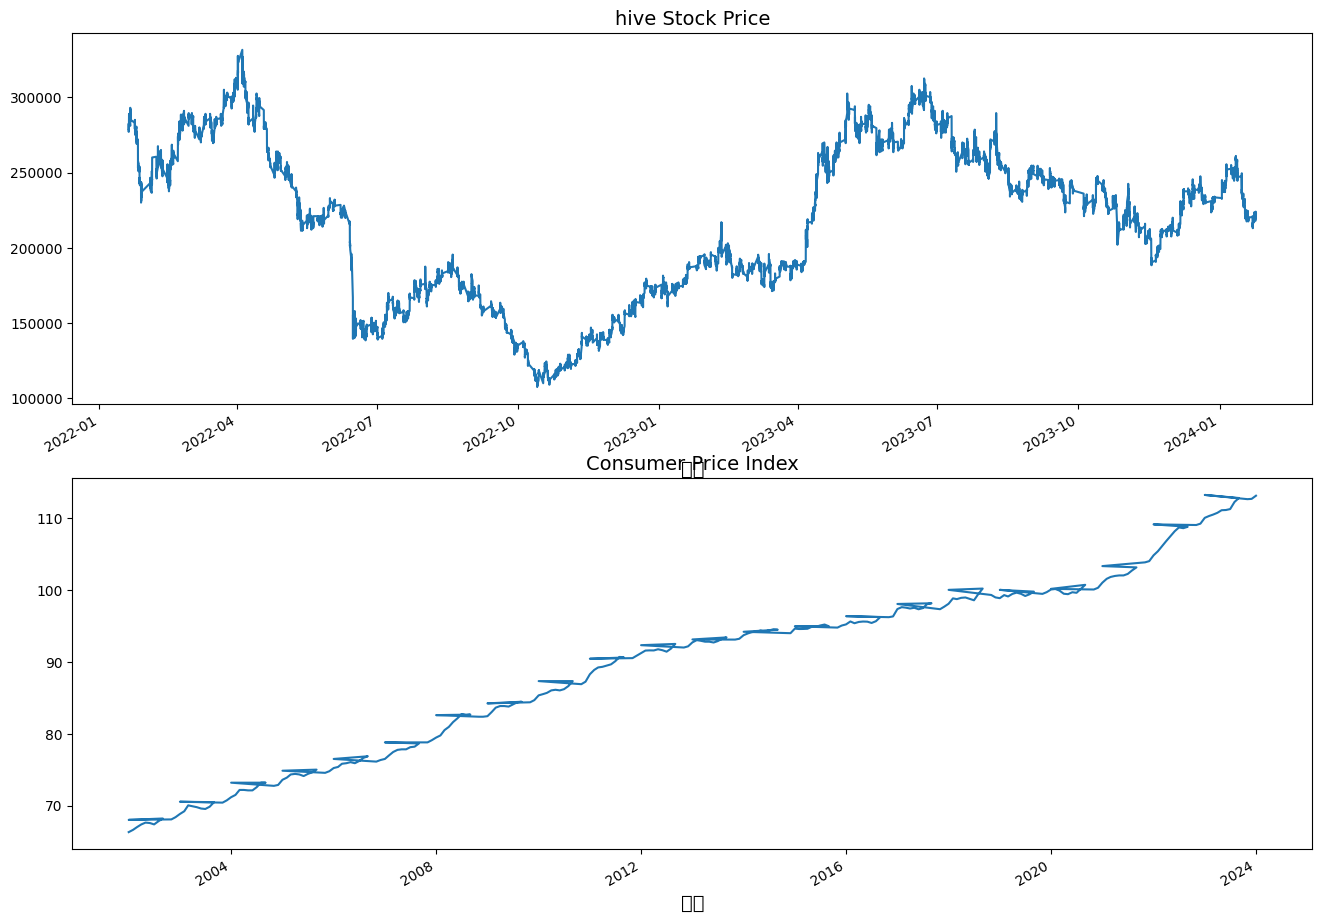

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(16, 12))
stock['hive'].plot(title='hive Stock Price', 
                        legend=False, ax=ax[0])
milk['소비자물가지수'].plot(title='Consumer Price Index', 
                        legend=False, ax=ax[1])

In [20]:
hive = pd.DataFrame(stock['hive'])
cpi = pd.DataFrame(milk['소비자물가지수'])

In [21]:
def split_data(data, test_split):
    l = len(data)
    t_idx = round(l*(1-test_split))
    train, test = data[ : t_idx], data[t_idx : ]
    print(f'train: {len(train)} , test: {len(test)}')
    return train, test

In [27]:
test_split = 0.15
hive_train, milk_test = split_data(milk, test_split)
cpi_train, life_test = split_data(stock, test_split)

train: 225 , test: 40
train: 160035 , test: 28242


In [28]:
#정상성 체크
def check_stationarity(df):
    results = adfuller(df)[1:3]
    s = 'Non-Stationary'
    if results[0] < 0.05:
        s = 'Stationary'
    print(f"'{s}\t p-value:{results[0]} \t lags:{results[1]}")
    return (s, results[0])

In [29]:
def get_best_model(score, c='AIC'):
    initial_score = score[0][c]
    best_model = 0
    for k,v in score.items():
        if v[c] < initial_score:
            initial_score = v[c]
            best_model = k
    print(f'Best model: {best_model} with lowest {c} score: {initial_score}')
    return score[best_model]['model']
#AIC 기준으로 가장 좋은 모델 찾기 

In [30]:
def plot_forecast(model, start, train, test):
    forecast = pd.DataFrame(model.forecast(test.shape[0]), 
                            index=test.index)
    ax = train.loc[start:].plot(style='--')
    test.plot(ax=ax)
    forecast.plot(ax=ax, style = '-.')
    ax.legend(['orig_train', 'orig_test', 'forecast'])
    # plt.show()
    return ax

#예측 그림

In [31]:
def combinator(items, r=1):
    combo = [i for i in product(*items, repeat=r)]
    return combo

<Axes: xlabel='날짜'>

C:\Users\문지환\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
C:\Users\문지환\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
C:\Users\문지환\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\문지환\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


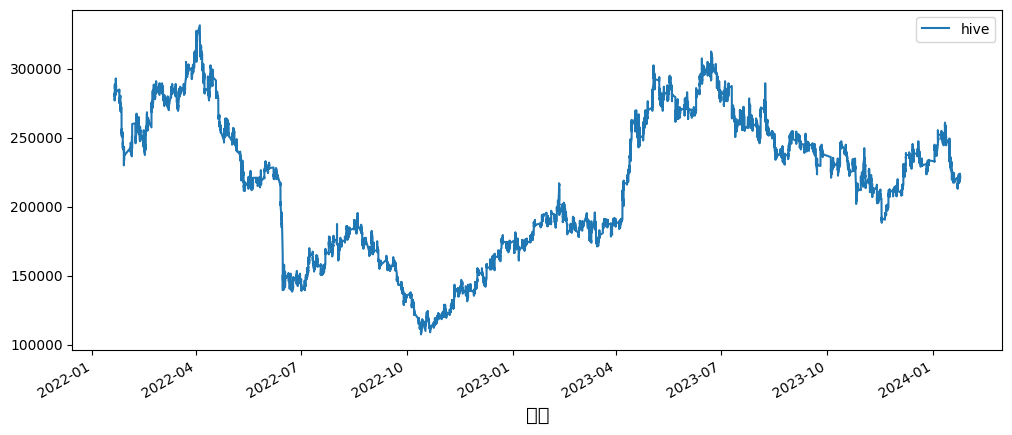

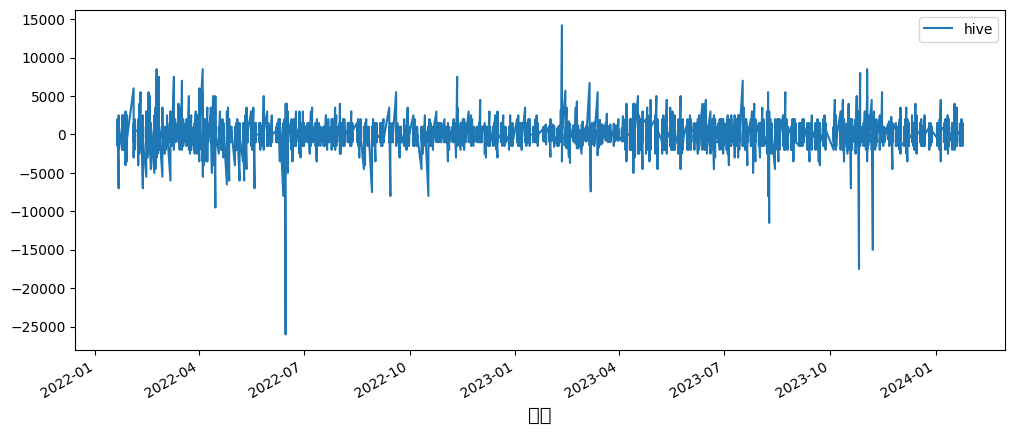

In [32]:
# plt.rcParams["figure.figsize"] = [16, 4]
hive.plot()
hive_diff = hive.diff().dropna()
hive_diff.plot()

In [33]:
check_stationarity(hive_diff)

'Stationary	 p-value:0.0 	 lags:8


('Stationary', 0.0)

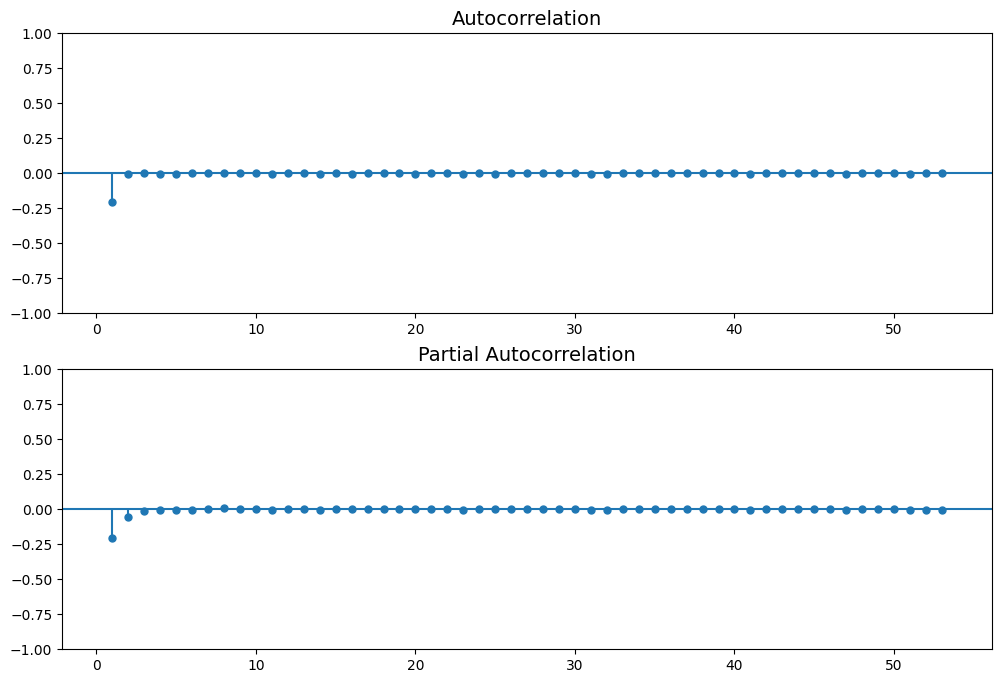

In [34]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
plot_acf(hive_diff, zero=False, ax=ax[0])
plot_pacf(hive_diff, zero=False, ax=ax[1])
#plt.savefig('images/fig_10.2.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
exponential_smoothing = ['add', 'mul']